# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



## Выполнил студент группы БВТ2101 Козей Михаил Александрович
***

### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [1]:
#импорты
import numpy as np
import heapq
from collections import deque
import copy
import sys
from PyQt5 import QtCore
from PyQt5.QtWidgets import QApplication, QMainWindow, QFileDialog, QPushButton, QComboBox, QLineEdit, QMessageBox, QLabel, QTableWidget, QTableWidgetItem, QDoubleSpinBox
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

<b>1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. </b>

<b>Алгоритм Флойда-Уоршелла</b> — это алгоритм нахождения кратчайших путей во взвешенном ориентированном или неориентированном графе. Алгоритм работает для графов с отрицательными ребрами и без циклов отрицательного веса. Он использует динамическое программирование для нахождения кратчайших путей между всеми парами вершин в графе.

Идея алгоритма заключается в том, что он на каждом шаге рассматривает возможные пути через промежуточные вершины и сравнивает их с текущими кратчайшими путями между соответствующими вершинами. Если найден путь, короче, чем текущий кратчайший путь, то он заменяет текущий кратчайший путь.

Алгоритм Флойда-Уоршелла имеет сложность O(N^3), где N - количество вершин в графе.

In [2]:
def floyd_warshall(graph):
    # Создание списка вершин
    nodes = list(graph.nodes())
    # Количество вершин в графе
    n = len(nodes)
    # Инициализация матрицы расстояний inf
    dist = [[float('inf') for i in range(n)] for j in range(n)]
    # Установка расстояний до вершин из самих себя равными 0
    for node in nodes:
        dist[node][node] = 0
    # Получение весов ребер и заполнение матрицы расстояний
    weights = dict(nx.get_edge_attributes(graph, 'weight'))
    for edge in graph.edges():
        dist[edge[0]][edge[1]] = weights[edge]
    # Алгоритм Флойда-Уоршелла для нахождения кратчайших путей
    for k in range(n):
        for i in range(n):
            for j in range(n):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
    # Возврат матрицы расстояний
    return dist


<b>Алгоритм Дейкстры</b> — это алгоритм нахождения кратчайшего пути от одной вершины до всех остальных вершин взвешенного графа без циклов. Он работает только с положительными весами ребер и использует жадный подход.
Алгоритм Дейкстры можно описать следующим образом:

    1.Инициализация: Создаем множество unvisited вершин, для каждой вершины устанавливаем расстояние до нее равным бесконечности, а расстояние до начальной вершины равным 0.

    2.Находим вершину с наименьшим расстоянием из unvisited и переносим ее в множество visited.

    3.Для каждой соседней вершины, которая еще не была помещена в visited, вычисляем новое расстояние до этой вершины как сумму расстояния от начальной вершины до текущей вершины и веса ребра, соединяющего эти две вершины. Если это новое расстояние меньше, чем старое, то обновляем расстояние.

    4.Повторяем шаги 2 и 3 до тех пор, пока все вершины не будут помещены в множество visited.

    5.Когда все вершины посещены, алгоритм заканчивает работу и мы получаем кратчайшие расстояния от начальной вершины до всех остальных вершин.

Этот алгоритм работает за время O(|E| + |V|log|V|), где |E| - количество ребер в графе, а |V| - количество вершин в графе. Он является оптимальным в случае, когда веса ребер положительны. Однако, если веса ребер отрицательны, то для нахождения кратчайшего пути нужно использовать алгоритм Беллмана-Форда или алгоритм Дейкстры с использованием кучи с приоритетами.

In [3]:
def dijkstra(graph, start):
    nodes = list(graph.nodes())
    adj_list = {node: [n for n in graph.neighbors(node)] for node in nodes}
    weights = dict(nx.get_edge_attributes(graph, 'weight'))
    inf = float('inf')
    dist = {node: inf for node in nodes}
    dist[start] = 0
    prev = {node: None for node in nodes}
    visited = []

    while nodes:
        # выбираем вершину с наименьшим расстоянием
        curr_node = min(nodes, key=lambda node: dist[node])
        
        # если текущая вершина - конечная, то выходим
        if dist[curr_node] == inf:
            break

        # обновляем кратчайшие расстояния до смежных вершин
        for neigh in graph.neighbors(curr_node):
            cost = dist[curr_node] + weights[(curr_node, neigh)]
            if cost < dist[neigh]:
                dist[neigh] = cost
                prev[neigh] = curr_node

        # помечаем текущую вершину как посещенную
        nodes.remove(curr_node)
        visited.append(curr_node)
    
    return dist

<b>Алгоритм Беллмана-Форда</b> — это алгоритм нахождения кратчайших путей во взвешенном ориентированном или неориентированном графе, который может работать с графами, содержащими ребра с отрицательными весами. Он использует метод динамического программирования для нахождения кратчайшего пути от одной из вершин графа до всех остальных вершин.

Алгоритм начинается с инициализации расстояний от начальной вершины до всех остальных вершин бесконечностью, кроме начальной вершины, расстояние до которой равно нулю. Затем алгоритм выполняет N-1 итераций, где N - количество вершин в графе. На каждой итерации алгоритм рассматривает все ребра графа и, если существует путь из одной вершины в другую, который короче текущего кратчайшего пути, то он обновляет расстояние до этой вершины. После N-1 итераций алгоритм проверяет, есть ли отрицательный цикл в графе, и если есть, то он сообщает о том, что кратчайший путь не может быть найден.

Алгоритм Беллмана-Форда имеет сложность O(N*M), где N - количество вершин в графе, а M - количество ребер. Алгоритм может работать с графами, содержащими отрицательные ребра, но он не может работать с графами, содержащими отрицательные циклы.

In [4]:
def bellman_ford(graph, start):
    # Создание списка вершин
    nodes = list(graph.nodes())
    # Количество вершин в графе
    n = len(nodes)
    # Бесконечное значение расстояния
    inf = float('inf')
    # Инициализация расстояний до всех вершин как бесконечность, кроме начальной вершины
    dist = {node: inf for node in nodes}
    dist[start] = 0
    # Инициализация словаря предыдущих вершин
    prev = {node: None for node in nodes}

    # Основной цикл алгоритма Беллмана-Форда
    for i in range(n - 1):
        for u, v, w in graph.edges(data=True):
            if dist[u] != inf and dist[u] + w['weight'] < dist[v]:
                # Если путь из начальной вершины до вершины v через вершину u короче,
                # чем текущий путь до v, то обновляем расстояние до v
                dist[v] = dist[u] + w['weight']
                # И запоминаем, что предыдущей вершиной для v была u
                prev[v] = u

    # Проверка наличия отрицательных циклов
    for u, v, w in graph.edges(data=True):
        if dist[u] != inf and dist[u] + w['weight'] < dist[v]:
            # Если расстояние до вершины v еще можно уменьшить,
            # значит в графе есть отрицательный цикл
            raise ValueError("Граф содержит отрицательный цикл")

    # Возврат словаря расстояний
    return dist


<b>Алгоритм Джонсона</b> - это алгоритм нахождения кратчайших путей между всеми парами вершин во взвешенном ориентированном графе. Он позволяет обойти ограничения, связанные с наличием отрицательных весов ребер, которые возникают при использовании алгоритмов Флойда-Уоршелла и Беллмана-Форда.

Алгоритм Джонсона основан на преобразовании графа путем добавления дополнительной вершины и ребер к исходному графу, которые позволяют избавиться от отрицательных весов ребер. Затем алгоритм использует модифицированный алгоритм Дейкстры для нахождения кратчайших путей между всеми парами вершин в преобразованном графе.

Алгоритм Джонсона состоит из следующих шагов:

    1.Добавление дополнительной вершины и ребер к исходному графу, которые позволяют избавиться от отрицательных весов ребер.
    2.Запуск алгоритма Беллмана-Форда для нахождения расстояний от дополнительной вершины до всех остальных вершин в преобразованном графе.
    3.Перевзвешивание ребер исходного графа с использованием найденных расстояний.
    4.Запуск модифицированного алгоритма Дейкстры для нахождения кратчайших путей между всеми парами вершин в преобразованном графе.

Алгоритм Джонсона имеет сложность O(N^2 log N + N*M), где N - количество вершин в графе, а M - количество ребер. Он может работать с графами, содержащими отрицательные веса ребер, и позволяет находить кратчайшие пути между всеми парами вершин в графе.

In [5]:
def johnson(graph):
    # добавляем фиктивную вершину
    graph.add_node('s')
    for u in graph.nodes():
        graph.add_edge('s', u, weight=0)
    
    # рассчитываем кратчайшие расстояния до каждой вершины
    h = bellman_ford(graph, 's')
    if not h:
        return None
    
    # обновляем веса ребер в копии графа
    graph = nx.DiGraph([(u, v, {'weight': d['weight'] + h[u] - h[v]}) for u, v, d in graph.edges(data=True)])
    
    # находим кратчайшие расстояния между всеми парами вершин
    dist = {}
    for u in graph.nodes():
        dist[u] = dijkstra(graph, u)
        for v in dist[u]:
            dist[u][v] -= h[u] - h[v]
    
    # удаляем фиктивную вершину из копии графа
    graph.remove_node('s')
    
    return dist

<b>Алгоритм Левита</b> (также известен как алгоритм "двустороннего поиска") — это алгоритм поиска кратчайшего пути в невзвешенном или взвешенном графе с неотрицательными весами ребер.

Алгоритм Левита имеет два прохода по графу: один проход от начальной вершины к конечной, а другой - в обратном направлении от конечной вершины к начальной. В процессе обхода графа алгоритм поддерживает три множества вершин: множество вершин, для которых уже найдено кратчайшее расстояние от начальной вершины, множество вершин, для которых уже найдено кратчайшее расстояние от конечной вершины, и множество вершин, для которых кратчайшее расстояние еще не было найдено.

Алгоритм Левита использует очередь с приоритетом для хранения вершин, которые нужно обработать. В отличие от других алгоритмов поиска кратчайшего пути, таких как алгоритм Дейкстры или алгоритм A*, алгоритм Левита обрабатывает вершины не по порядку их удаленности от начальной вершины, а по порядку их удаленности от текущей оптимальной вершины.

В процессе работы алгоритма Левита каждая вершина посещается не более двух раз, что позволяет ему работать быстрее, чем алгоритмы Дейкстры и А*. Алгоритм Левита имеет линейную сложность O(E + V), где E - количество ребер в графе, а V - количество вершин.

In [6]:
def levit(G, source, target):
    # Инициализация списка расстояний до вершин графа
    dist = dict.fromkeys(G, float('inf'))
    dist[source] = 0
    # Инициализация списка S (множество посещенных вершин) и очереди Q
    S = [source]
    Q = deque([])
    pred = {} # Словарь предшествующих вершин для восстановления пути

    # Заполнение очереди Q вершинами, кроме исходной
    for v in G:
        if v != source:
            Q.append(v)

    # Основной цикл алгоритма
    while Q:
        # Проход по всем вершинам в S
        for v in S:
            # Проход по всем соседним вершинам w
            for w in G[v]:
                # Если расстояние до w можно уменьшить через вершину v
                if dist[w] > dist[v] + G[v][w]['weight']:
                    dist[w] = dist[v] + G[v][w]['weight'] # Обновление расстояния до w
                    pred[w] = v # Обновление предшествующей вершины для w
                    if w not in Q:
                        Q.append(w) # Добавление w в очередь Q

        # Поиск ближайшей вершины, не принадлежащей S
        min_dist = float('inf')
        min_node = None

        for n in Q:
            if dist[n] < min_dist:
                min_dist = dist[n]
                min_node = n

        # Добавление ближайшей вершины в S и удаление ее из Q
        if min_node is not None and min_dist != float('inf'):
            S.append(min_node)
            Q.remove(min_node)

    # Восстановление пути из исходной вершины до целевой
    path = [target]
    while target != source:
        path.append(pred[target])
        target = pred[target]
    path.reverse()

    return path, dist

<b>Алгоритм Йена</b> — это алгоритм поиска k-кратчайших путей в графе между заданными начальной и конечной вершинами. Он был предложен Шан-Тун Йеном в 1971 году.

Алгоритм Йена основан на алгоритме Дейкстры и последовательном удалении наилучшего пути, после чего он снова применяет алгоритм Дейкстры для поиска следующего наилучшего пути, и так далее до тех пор, пока не будут найдены все k кратчайших путей между начальной и конечной вершинами.

Для удаления наилучшего пути алгоритм Йена использует технику "отката". Он строит k кратчайших путей с помощью последовательных итераций. На каждой итерации алгоритм Йена находит наилучший путь между начальной и конечной вершинами и удаляет его. Затем он находит новый наилучший путь между начальной и конечной вершинами, который не проходит через узлы, которые были удалены на предыдущих итерациях. Это позволяет алгоритму находить новые пути, не дублируя уже найденные.

Алгоритм Йена имеет ту же асимптотическую сложность, что и алгоритм Дейкстры, т.е. O(E + V log V), где E - количество ребер в графе, а V - количество вершин. Однако, в худшем случае, он может быть медленнее алгоритма Дейкстры из-за необходимости многократного применения алгоритма Дейкстры.

In [7]:
def yen_k_shortest_paths(graph, source, target, k):
    # Путь от источника до цели
    A = [(nx.shortest_path(graph, source, target, weight='weight'), nx.shortest_path_length(graph, source, target, weight='weight'))]
    # Потенциальные кратчайшие пути
    B = []
    for k in range(1, k):
        # Для каждого потенциального кратчайшего пути
        for i in range(len(A[-1][0]) - 1):
            # Получаем подграф пути
            spurNode = A[-1][0][i]
            rootPath = A[-1][0][:i + 1]
            edges_removed = []
            for path in A:
                if len(path[0]) > i and rootPath == path[0][:i + 1]:
                    # Удаляем ребра, входящие в потенциальный кратчайший путь
                    u = path[0][i]
                    v = path[0][i + 1]
                    if graph.has_edge(u, v):
                        edge_attr = graph.get_edge_data(u, v)
                        graph.remove_edge(u, v)
                        edges_removed.append((u, v, edge_attr))
            # Получаем новый путь от спур-вершины до целевой вершины
            try:
                spurPath = nx.shortest_path(graph, spurNode, target, weight='weight')
            except nx.exception.NetworkXNoPath:
                continue
            totalPath = rootPath[:-1] + spurPath
            totalPathLength = nx.shortest_path_length(graph, source=source, target=target, weight='weight', path=totalPath)
            if (totalPath, totalPathLength) not in B:
                B.append((totalPath, totalPathLength))
            # Восстанавливаем удаленные ребра
            for e in edges_removed:
                u, v, edge_attr = e
                graph.add_edge(u, v, **edge_attr)
        # Если все потенциальные пути проверены
        if len(B) == 0:
            break
        # Выбираем следующий кратчайший путь
        A.append(B.pop(0))
    return A


<b>2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса.</b>

In [8]:
def generate_adjacency_matrix(num_nodes, chance_of_edge):
    # Создаем пустую матрицу смежности.
    matrix = [[0] * num_nodes for _ in range(num_nodes)]
    # Создаем список, чтобы отслеживать посещенные узлы при поиске в ширину.
    visited = [False] * num_nodes

    # Создаем список ребер.
    edges = []
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            # Генерируем случайное число и, если оно меньше или равно
            # заданному шансу на создание ребра, добавляем ребро в список.
            if random.randint(1, 100) <= chance_of_edge:
                weight = random.randint(1, 10)
                edges.append((i, j, weight))
    
    # Добавляем новые ребра, чтобы связать несвязанные узлы.
    def bfs(start):
        # Помечаем начальный узел как посещенный и добавляем его в очередь.
        visited[start] = True
        q = deque([start])
        while q:
            # Извлекаем узел из очереди и ищем его непосещенных соседей.
            node = q.popleft()
            for neighbor in range(num_nodes):
                if not visited[neighbor] and matrix[node][neighbor] != 0:
                    # Если сосед еще не посещен и между узлами есть ребро,
                    # помечаем его как посещенный и добавляем в очередь.
                    visited[neighbor] = True
                    q.append(neighbor)
    
    # Запускаем поиск в ширину из первого узла.
    bfs(0)
    # Если есть непосещенные узлы, значит, граф не связный.
    for i in range(num_nodes):
        if not visited[i]:
            # Выбираем случайный узел из несвязанной компоненты и
            # связываем его со случайным узлом из связанной компоненты.
            j = random.randint(0, i - 1)
            weight = random.randint(1, 10)
            matrix[i][j] = matrix[j][i] = weight
    
    # Заполняем матрицу смежности существующими ребрами.
    for edge in edges:
        matrix[edge[0]][edge[1]] = edge[2]
    
    # Возвращаем готовую матрицу смежности.
    return matrix


<b>4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.</b>

In [9]:
def test_floyd_warshall(graph):
    start_time = time.time()
    floyd_warshall(graph)
    end_time = time.time()
    time_diff = end_time - start_time
    return "{:.2f}".format(time_diff*1000)

def test_dijkstra(graph):
    total_time = 0
    for node in graph.nodes():
        start_time = time.time()
        dijkstra(graph, node)
        end_time = time.time()
        time_diff = end_time - start_time
        total_time += time_diff
    return "{:.2f}".format(total_time*1000)

def test_bellman_ford(graph):
    total_time = 0
    for node in graph.nodes():
        start_time = time.time()
        bellman_ford(graph, node)
        end_time = time.time()
        time_diff = end_time - start_time
        total_time += time_diff
    return "{:.2f}".format(total_time*1000)

def test_johnson(graph):
    start_time = time.time()
    johnson(graph)
    end_time = time.time()
    time_diff = end_time - start_time
    return "{:.2f}".format(time_diff*1000)

def test_levit(graph):
    total_time = 0
    for node in graph.nodes():
        start_time = time.time()
        for target_node in graph.nodes():
            levit(graph, target_node, node)  # Передаем target_node как целевой узел
        end_time = time.time()
        time_diff = end_time - start_time
        total_time += time_diff
    return "{:.2f}".format(total_time*1000)

def test_yen(graph):
    total_time = 0
    for node1 in graph.nodes():
        for node2 in graph.nodes():
            if node1 != node2:
                start_time = time.time()
                yen_k_shortest_paths(graph, node1, node2, 1) 
                end_time = time.time()
                time_diff = end_time - start_time
                total_time += time_diff
    return "{:.2f}".format(total_time*1000)


results_floyd_warshall = []
results_dijkstra = []
bellman_ford_results = []
results_johnson = []
results_levit = []
results_yen_k_shortest_paths = []


for nodes in [10, 20, 30, 40, 50]:
    matrix = generate_adjacency_matrix(nodes, 50)
    graph = nx.DiGraph(np.array(matrix))
    results_floyd_warshall.append(test_floyd_warshall(graph))
    results_dijkstra.append(test_dijkstra(graph))
    bellman_ford_results.append(test_bellman_ford(graph))
    results_johnson.append(test_johnson(graph))
    results_levit.append(test_levit(graph))
    results_yen_k_shortest_paths.append(test_yen(graph))


# создаем таблицу с названием и сложностью каждого алгоритма
data = {
    "Узлов": [10, 20, 30, 40, 50],
    "Флойда-Уоршелла": results_floyd_warshall,
    "Дейкстры": results_dijkstra,
    "Беллмана-Форда": bellman_ford_results,
    "Джонсона": results_johnson,
    "Левита": results_levit,
    "Йена": results_yen_k_shortest_paths
}
pd.set_option('display.width', 1000)
df = pd.DataFrame(data)


# выводим таблицу
print(df)

<b>3. Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.</b>

SystemExit: 0

C:\Users\Misha\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


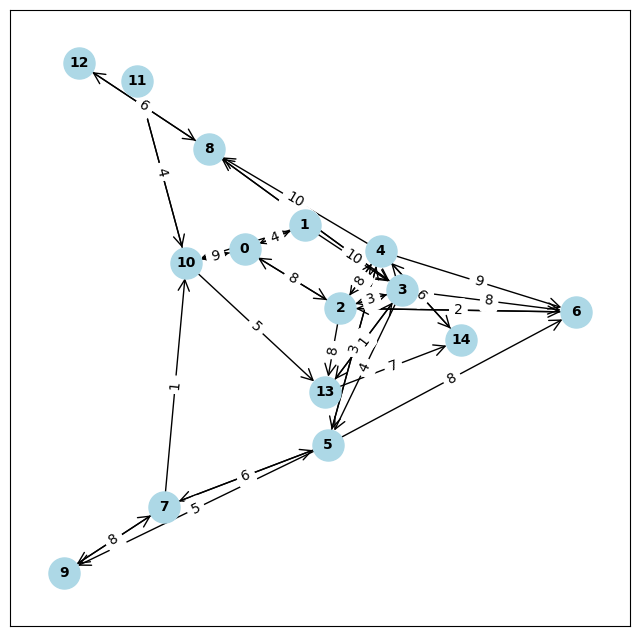

In [ ]:
class MainWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        self.graph = None
        self.showGraph = True
        self.initUI()

    def initUI(self):
        # Создание кнопки для выбора файла с матрицей смежности/инцидентности
        self.fileButton = QPushButton('Выбрать файл', self)
        self.fileButton.setGeometry(10, 10, 150, 50)
        self.fileButton.clicked.connect(self.loadFile)

        # Создание выпадающего списка для выбора алгоритма
        self.algorithmComboBox = QComboBox(self)
        self.algorithmComboBox.setGeometry(10, 70, 150, 50)
        self.algorithmComboBox.addItem('Алгоритм Флойда-Уоршелла')
        self.algorithmComboBox.addItem('Алгоритм Дейкстры')
        self.algorithmComboBox.addItem('Алгоритм Беллмана-Форда')
        self.algorithmComboBox.addItem('Алгоритм Джонсона')
        self.algorithmComboBox.addItem('Алгоритм Левита')
        self.algorithmComboBox.addItem('Алгоритм Йена')

        # Создание текстовых полей для ввода вершин
        self.sourceVertexLineEdit = QLineEdit(self)
        self.sourceVertexLineEdit.setGeometry(10, 130, 50, 30)
        self.sourceVertexLineEdit.setPlaceholderText('Откуда')
        self.destVertexLineEdit = QLineEdit(self)
        self.destVertexLineEdit.setGeometry(70, 130, 50, 30)
        self.destVertexLineEdit.setPlaceholderText('Куда')

        # Создание кнопки для расчета кратчайшего расстояния
        self.calculateButton = QPushButton('Рассчитать', self)
        self.calculateButton.setGeometry(10, 170, 150, 50)
        self.calculateButton.clicked.connect(self.calculateShortestPath)

        # Создание кнопки для генерации случайной матрицы смежности
        self.calculateButton = QPushButton('Рандом', self)
        self.calculateButton.setGeometry(10, 230, 150, 50)
        self.calculateButton.clicked.connect(self.load_random_matrix)

        # Создание текстового поля для ввода количества вершин в случайной матрице
        self.nodesVertexLineEdit = QLineEdit(self)
        self.nodesVertexLineEdit.setGeometry(10, 290, 50, 30)
        self.nodesVertexLineEdit.setPlaceholderText('Вершин')

        # Создание текстового поля для ввода вероятности ребра в случайной матрице
        self.chanceVertexLineEdit = QLineEdit(self)
        self.chanceVertexLineEdit.setGeometry(70, 290, 50, 30)
        self.chanceVertexLineEdit.setPlaceholderText('Шанс')

        # Создание виджета для отображения графа
        self.graphWidget = plt.figure()
        self.graphWidgetCanvas = FigureCanvas(self.graphWidget)
        self.graphWidgetCanvas.setParent(self)
        self.graphWidgetCanvas.setGeometry(170, 10, 800, 800)

        # переключатель на таблицу
        self.tableButton = QPushButton('Таблица', self)
        self.tableButton.setGeometry(10, 350, 150, 50)
        self.tableButton.clicked.connect(self.showTable)
        self.tableShown = False
        
        self.tableWidget = QTableWidget(self)
        self.tableWidget.setGeometry(170, 10, 800, 800)
        self.tableWidget.setColumnCount(len(data.keys()))
        self.tableWidget.setHorizontalHeaderLabels(data.keys())
        self.tableWidget.setRowCount(len(list(data.values())[0]))
        for i, key in enumerate(data.keys()):
            for j, value in enumerate(data[key]):
                item = QTableWidgetItem(str(value))
                self.tableWidget.setItem(j, i, item)
        self.tableWidget.hide()


        self.setGeometry(100, 100, 1000, 825)
        self.setWindowTitle('Кратчайший путь в графе')

    def showTable(self):
        if self.tableShown:
            self.tableShown = False
            self.graphWidgetCanvas.show()
            self.tableWidget.hide()
        else:
            self.tableShown = True
            self.graphWidgetCanvas.hide()
            self.tableWidget.show()
        
    def load_random_matrix(self):
        # очистка виджета от предыдущего графа
        self.tableWidget.hide()
        self.graphWidgetCanvas.show()
        self.graphWidget.clf()

        nodes = int(self.nodesVertexLineEdit.text())
        chance = int(self.chanceVertexLineEdit.text())
        matrix = generate_adjacency_matrix(nodes, chance)
        self.graph = nx.DiGraph(np.array(matrix))
        weights = dict(nx.get_edge_attributes(self.graph, 'weight'))

        # Отображение графа на виджете
        pos = nx.spring_layout(self.graph, seed=42, k=0.2)
        nx.draw_networkx(self.graph, pos=pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_color='black', font_weight='bold', arrowsize=20, arrowstyle='->')
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=weights)
        self.graphWidgetCanvas.draw_idle()

    def loadFile(self):
        # Открытие диалогового окна для выбора файла
        self.tableWidget.hide()
        self.graphWidgetCanvas.show()
        filename, _ = QFileDialog.getOpenFileName(self, caption='Выбрать файл', filter='Text Files (*.txt)')
        if filename:
            # Чтение матрицы смежности/инцидентности из файла
            with open(filename, 'r') as file:
                matrix = [[int(num) for num in line.split()] for line in file]
            
            # очистка виджета от предыдущего графа
            self.graphWidget.clf()
            # Создание графа из матрицы смежности/инцидентности
            self.graph = nx.DiGraph(np.array(matrix))
            weights = dict(nx.get_edge_attributes(self.graph, 'weight'))

            # Отображение графа на виджете
            pos = nx.spring_layout(self.graph, seed=42, k=0.2)
            nx.draw_networkx(self.graph, pos=pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_color='black', font_weight='bold', arrowsize=20, arrowstyle='->')
            nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=weights)
            self.graphWidgetCanvas.draw_idle()

    def calculateShortestPath(self):
        if not self.graph:
            # Если граф не был загружен, вывести сообщение об ошибке
            msg = QMessageBox()
            msg.setIcon(QMessageBox.Critical)
            msg.setText('Ошибка')
            msg.setInformativeText('Граф не был загружен')
            msg.setWindowTitle('Ошибка')
            msg.exec_()
        else:
            # Получение выбранного алгоритма
            algorithm = self.algorithmComboBox.currentText()
            G_copy = graph.copy()
            # Получение вершин для расчета кратчайшего пути
            source = int(self.sourceVertexLineEdit.text())
            dest = int(self.destVertexLineEdit.text())

            # Расчет кратчайшего пути с использованием выбранного алгоритма
            if algorithm == 'Алгоритм Флойда-Уоршелла':
                dist = floyd_warshall(G_copy)
                shortestPath = dist[source][dest]
            elif algorithm == 'Алгоритм Дейкстры':
                dist = dijkstra(G_copy, source)
                shortestPath = dist[dest]
            elif algorithm == 'Алгоритм Беллмана-Форда':
                dist = bellman_ford(G_copy, source)
                shortestPath = dist[dest]
            elif algorithm == 'Алгоритм Джонсона':
                dist = johnson(G_copy)
                shortestPath = dist[source][dest]
            elif algorithm == 'Алгоритм Левита':
                dist, shortestPaths = levit(G_copy, source, dest)
                shortestPath = shortestPaths[dest]
            elif algorithm == 'Алгоритм Йена':
                dist = yen_k_shortest_paths(G_copy, source, dest, k=1)
                shortestPath = dist[0][1]

            # Отображение кратчайшего пути на виджете
            if shortestPath is not None:
                plt.clf()
                pos = nx.spring_layout(self.graph, seed=42, k=0.2)
                nx.draw_networkx(self.graph, pos=pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_color='black', font_weight='bold', arrowsize=20, arrowstyle='->')
                weights = dict(nx.get_edge_attributes(self.graph, 'weight'))
                nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=weights)
                path = nx.shortest_path(self.graph, source=source, target=dest, weight='weight')
                path_edges = list(zip(path, path[1:]))
                nx.draw_networkx_edges(self.graph, pos=pos, edgelist=path_edges, edge_color='r', width=2)
                self.graphWidgetCanvas.draw()
                
                # Вывод кратчайшего расстояния на экран
                msg = QMessageBox()
                msg.setIcon(QMessageBox.Information)
                msg.setText('Кратчайшее расстояние')
                msg.setInformativeText(str(shortestPath))
                msg.setWindowTitle('Результат')
                msg.exec_()
            else:
                # Если кратчайший путь не найден, вывести сообщение об ошибке
                msg = QMessageBox()
                msg.setIcon(QMessageBox.Critical)
                msg.setText('Ошибка')
                msg.setInformativeText('Кратчайший путь не найден')
                msg.setWindowTitle('Ошибка')
                msg.exec_()

if __name__ == '__main__':
    app = QApplication(sys.argv)
    mainWindow = MainWindow()
    mainWindow.show()
    sys.exit(app.exec_())

### Вывод

В данной лабороторной работе мы разобрались с принципом работы алгоритмов поиска кратчайшего пути для задачи коммивояжёра.